In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import netCDF4
import time
import xarray

In [5]:
phil = pd.read_pickle(os.path.join('..','deconstruct_cyn','phil_cyclones.pkl'))

In [6]:
phil_noindex = pd.read_pickle(os.path.join('..','deconstruct_cyn','phil_cyclones_noindex.pkl'))

In [8]:
phil.shape

(14999, 16)

In [9]:
phil_noindex.shape

(14999, 13)

In [10]:
phil_noindex

,storm_sn,name,time_recorded,landfall,genesis_basin,season,lat,lon,max_wind,min_pres,dist2land,z,phil_box
2637339,b'1884231N11128',b'NOT NAMED',1884-08-20 12:00:00,33.0,2,1884,16.70,120.05,NaN,NaN,33.0,-391.0,True
2641912,b'1884343N14124',b'NOT NAMED',1884-12-07 18:00:00,11.0,2,1884,14.10,124.25,NaN,NaN,11.0,-3.0,True
2645544,b'1885115N11127',b'NOT NAMED',1885-04-25 12:00:00,0.0,2,1885,10.75,123.35,NaN,NaN,0.0,178.0,True
2666363,b'1887180N10126',b'NOT NAMED',1887-06-29 12:00:00,0.0,2,1887,11.20,122.70,NaN,NaN,0.0,125.0,True
2705338,b'1890289N12124',b'NOT NAMED',1890-10-19 18:00:00,112.0,2,1890,15.10,118.90,NaN,NaN,112.0,-4623.0,True
2713346,b'1891263N17124',b'NOT NAMED',1891-09-20 06:00:00,77.0,2,1891,17.30,123.55,NaN,NaN,121.0,-4881.0,True
2713348,b'1891263N17124',b'NOT NAMED',1891-09-20 18:00:00,11.0,2,1891,18.50,122.20,NaN,NaN,11.0,33.0,True
2717357,b'1891320N13125',b'NOT NAMED',1891-11-15 18:00:00,0.0,2,1891,13.30,124.55,NaN,NaN,39.0,-1391.0,True
2754994,b'1895131N11127',b'NOT NAMED',1895-05-13 06:00:00,0.0,2,1895,16.20,121.50,NaN,NaN,0.0,734.0,True
2754996,b'1895131N11127',b'NOT NAMED',1895-05-13 18:00:00,54.0,2,1895,17.60,122.80,NaN,NaN,54.0,-3658.0,True


In [27]:
wmo_phil = phil[phil.center == '19']

In [33]:
wmo_phil_landfall = wmo_phil[wmo_phil.z >= 0]

In [35]:
wmo_phil_landfall.storm_sn.value_counts()

b'1976131N12142'    9
b'1955329N10129'    7
b'1979271N13113'    6
b'1993271N14134'    6
b'1966299N10137'    6
b'1973320N05142'    6
b'1966321N09138'    6
b'2009270N10148'    6
b'1984239N08146'    5
b'2015285N14151'    4
b'1977194N07142'    4
b'1952180N05144'    4
b'1957309N11161'    4
b'1960173N08137'    4
b'1979300N04166'    4
b'2014334N02156'    4
b'1991289N06156'    4
b'1991187N06139'    4
b'1991163N11128'    4
b'1970286N06143'    4
b'1966130N06139'    4
b'1964344N06153'    4
b'1999288N12129'    4
b'1998259N17118'    4
b'1956187N12126'    4
b'2008169N08135'    4
b'1960112N09127'    4
b'1972004N10142'    3
b'1980296N05165'    3
b'2011282N08136'    3
                   ..
b'2015183N13130'    1
b'1978262N14135'    1
b'2012331N03157'    1
b'1970190N12140'    1
b'1969187N09131'    1
b'1952245N09139'    1
b'1994345N06165'    1
b'1972187N11126'    1
b'1953172N08142'    1
b'1982073N07153'    1
b'1953299N09138'    1
b'2013210N13122'    1
b'2013220N12137'    1
b'1971218N08161'    1
b'1981317N

In [45]:
wmo_phil_landfall.groupby('season')['z'].count()

season
1951     9
1952    18
1953     7
1954    12
1955     9
1956    15
1957    13
1958     2
1959     8
1960    13
1961     3
1962     8
1963     7
1964    18
1965     4
1966    17
1967     9
1968     8
1969     6
1970    20
1971    23
1972    12
1973    11
1974    18
1975     6
1976    14
1977     8
1978    12
1979    19
1980    13
        ..
1986    12
1987     9
1988     5
1989    10
1990     6
1991    22
1992     3
1993    19
1994     8
1995     6
1996     7
1997     3
1998    13
1999    12
2000     9
2001     7
2003     8
2004     7
2005     4
2006    14
2007     7
2008    10
2009    13
2010     4
2011     9
2012     4
2013    12
2014    12
2015    14
2016     4
Name: z, Length: 65, dtype: int64

In [46]:
cont = pd.cut(wmo_phil_landfall.groupby('season')['z'].count(), 10)

In [47]:
cont.head()

season
1951     (8.3, 10.4]
1952    (16.7, 18.8]
1953      (6.2, 8.3]
1954    (10.4, 12.5]
1955     (8.3, 10.4]
Name: z, dtype: category
Categories (10, interval[float64]): [(1.979, 4.1] < (4.1, 6.2] < (6.2, 8.3] < (8.3, 10.4] ... (14.6, 16.7] < (16.7, 18.8] < (18.8, 20.9] < (20.9, 23.0]]

IndexError: tuple index out of range

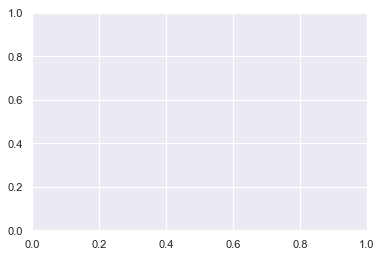

In [49]:
plt.plot(cont)